# The Sparks Foundation

**Data Science and Business Analytics Internship**

Task #1 : Prediction Using supervised ML

Predict the percentage of a student's score based on the number of study hours using Python/R/SAS

Importing  the Packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the file:

In [3]:
link="http://bit.ly/w-data"
dst=pd.read_csv(link)
dst

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualizing the dataset



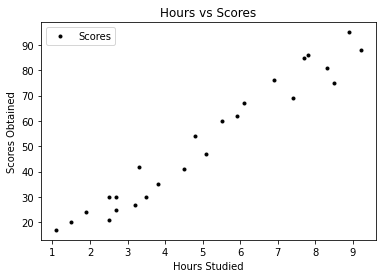

In [4]:
dst.plot(x='Hours',y='Scores',style='.',color='black')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

Assigning the values to independent and dependent variable 

In [5]:
x=dst['Hours'].values
print(x)
print(type(x))


[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
<class 'numpy.ndarray'>


In [6]:
y=dst['Scores'].values
print(y)
print(type(y))

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
<class 'numpy.ndarray'>


Splitting the dataset into training and testing data 

In [7]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=2022)

Number of coloumns and row split into training and testing data 

In [8]:
train_x = np.reshape(train_x,(-1,1))
test_x = np.reshape(test_x,(-1,1))
train_y = np.reshape(train_y,(-1,1))
test_y = np.reshape(test_y,(-1,1))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(22, 1)
(22, 1)
(3, 1)
(3, 1)


Train the ML Model

In [9]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_x,train_y)
print(regressor.coef_)
print(regressor.intercept_)

[[9.81024644]]
[2.67259046]


In [10]:
#Predict from the fit model
pred_y=regressor.predict(test_x)


Comparing the actual and predicted values

In [11]:
for i in range(0,len(pred_y)):
    print("Predicted:",pred_y[i],"Actual:",test_y[i])

Predicted: [37.008453] Actual: [30]
Predicted: [75.26841412] Actual: [69]
Predicted: [49.76177337] Actual: [54]


Plotting the regression line

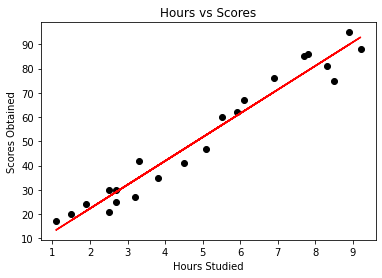

In [12]:
plt.scatter(train_x,train_y,color='black')
plt.plot(train_x,regressor.predict(train_x),color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

Predicted Score if a student studies for 9.25 hrs/day

In [13]:
no_hours=9.25
predicted_score=regressor.predict([[no_hours]])
print("Number of Hours={}".format(no_hours))
print("Predicted Score={}".format(predicted_score[0]))


Number of Hours=9.25
Predicted Score=[93.41737004]


Evaluating the model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_y, pred_y)) 

Mean Absolute Error: 5.838364582680131
